# COGS 108 - EDA Checkpoint

# Names

- Alan Apte
- Zihang Xu
- Carlos Martinez
- Lam Nghiem
- Rainee Pei

<a id='research_question'></a>
# Research Question

What affects the popularity of instant ramen brands/companies?*Fill in your research question here*

# Setup

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.probability import FreqDist

import string

from nltk.stem import PorterStemmer


# Data Cleaning


The data looks fairly clean already besides a few unusable inputs for ratings. One of the ramens listed had a rating of “NS”, which we decided to remove the entire row from the dataset. All the brand names were consistent with each other, so we didn’t have to rewrite them so that they were formatted in the same way. We removed the “URL” column because we are not planning to use that data for this project. Ultimately, we didn’t do very much to the dataset because most of the ratings were already in numerical values, and object values for other columns had consistent types.

We tokenized, removed stop words and stemmed the 'Variety' column. Then, applied those changes to the dataframe for later analysis.

In [37]:
#import dataset
df = pd.read_csv('ramen ratings.csv')

#remove URL column
df = df[['ID', 'Brand', 'Variety', 'Style', 'Country', 'Stars']]

#make sure all ratings in 'Stars' column are numerical values (float64)
#drop rows without numerical rating in 'Stars' column
df = df[pd.to_numeric(df['Stars'], errors='coerce').notnull()]
df['Stars'] = df['Stars'].astype(float)

#replace flavour with flavor

def standardize_flavor(string):
    string = string.lower()
    string = string.strip()
    
    output = string.replace('flavour', 'flavor')
    
    return output

df['Variety'] = df['Variety'].apply(standardize_flavor)

#tokenize and stop words
x = df.loc[:, 'Variety']
sentence=' '.join(x)
tokenized_word = word_tokenize(sentence)
df['Variety'] = df['Variety'].apply(word_tokenize)

stop_words = stopwords.words('english')
newStopWords = ['(',')','-','_',':','&']
stop_words.extend(newStopWords)

tokenized_word
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)

#stemming
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

df['Variety'] = df['Variety'].apply(lambda x: [ps.stem(y) for y in x])

#apply stop words
df['Variety'] = df['Variety'].apply(lambda x: [item for item in x if item not in stop_words])



# Data Analysis & Results (EDA)

Made graphs for: 

Variety word freq. (line)
    We plotted it in descending order.

Style vs Stars (bar)

Brand vs Stars (bar)
    There were too many brands to graph, so we chose the first 50 for now. We plan to use only the top 50 later on.
    
Country vs Stars (bar)
    We plan to adjust the graph to be in descending order.

All data from graphs used the average ratings for each variable. 

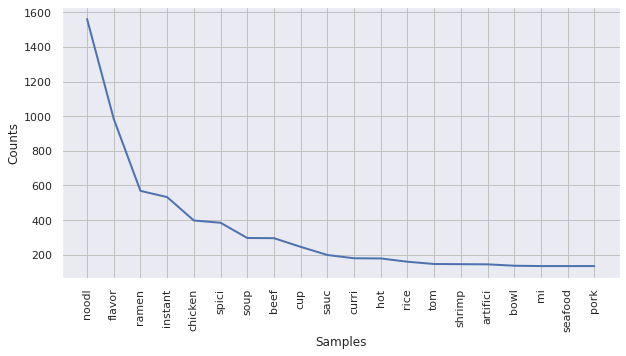

In [88]:
variety = df['Variety'].apply(pd.Series).stack()

# calculation word frequency
fdist_variety = FreqDist(variety)

# Frequency Distribution Plot - top 20
# for words in variety
fdist_variety.plot(20, cumulative=False);

sns.set(rc={'figure.figsize':(8,5)})

In [17]:
#Country vs Stars
print(df['Country'].unique())
df['Country'] = df['Country'].replace('USA', 'United States')
df['Country'] = df['Country'].replace('UK', 'United Kingdom')
df['Country'] = df['Country'].replace('Souh Korea', 'South Korea')
print(df['Country'].unique())
countries = df.groupby("Country")
avgStars = countries['Stars'].agg(np.mean)
starsArr = avgStars.array
starDf = pd.DataFrame(starsArr)
countryRatings = pd.DataFrame(sorted(df['Country'].unique()), columns=['Country'])
countryRatings['Stars'] = starDf
countryRatings.head()

['Malaysia' 'Taiwan' 'Japan' 'United States' 'Thailand' 'Indonesia'
 'France' 'South Korea' 'China' 'Singapore' 'Hong Kong' 'Brazil' 'Israel'
 'Vietnam' 'Mexico' 'Canada' 'Peru' 'Spain' 'Portugal' 'United Kingdom'
 'Italy' 'Russia' 'Philippines' 'Bangladesh' 'Australia' 'New Zealand'
 'Ukraine' 'Sarawak' 'Netherlands' 'Poland' 'Germany' 'India' 'Phlippines'
 'Nigeria' 'Ghana' 'Hungary' 'Fiji' 'Pakistan' 'Nepal' 'Myanmar'
 'Cambodia' 'Finland' 'Sweden' 'Colombia' 'Estonia' 'Holland' 'Dubai']
['Malaysia' 'Taiwan' 'Japan' 'United States' 'Thailand' 'Indonesia'
 'France' 'South Korea' 'China' 'Singapore' 'Hong Kong' 'Brazil' 'Israel'
 'Vietnam' 'Mexico' 'Canada' 'Peru' 'Spain' 'Portugal' 'United Kingdom'
 'Italy' 'Russia' 'Philippines' 'Bangladesh' 'Australia' 'New Zealand'
 'Ukraine' 'Sarawak' 'Netherlands' 'Poland' 'Germany' 'India' 'Phlippines'
 'Nigeria' 'Ghana' 'Hungary' 'Fiji' 'Pakistan' 'Nepal' 'Myanmar'
 'Cambodia' 'Finland' 'Sweden' 'Colombia' 'Estonia' 'Holland' 'Dubai']


Country     Stars
0   Australia  3.260000
1  Bangladesh  3.479167
2      Brazil  3.678571
3    Cambodia  4.200000
4      Canada  2.330357

In [66]:
#Top 5 countries with highest rated ramen on average
topCountry = countryRatings.sort_values(by ='Stars', ascending=False)
topCountry.head()

Country     Stars
11     France  4.350000
39      Spain  4.250000
3    Cambodia  4.200000
22   Malaysia  4.185385
37  Singapore  4.114964

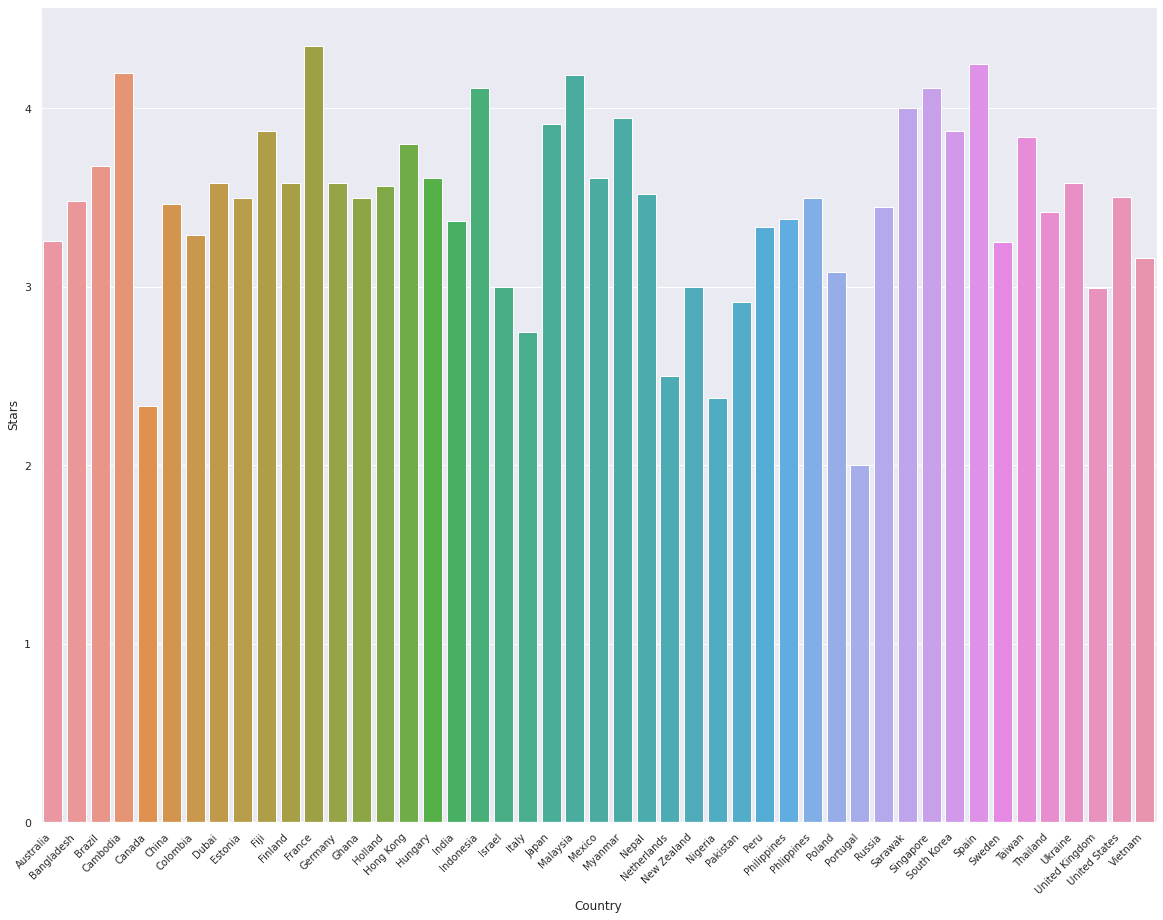

In [67]:
CountryStars = sns.barplot(x= 'Country', y= 'Stars', data = countryRatings)
CountryStars.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize = 10)
sns.set(rc={'figure.figsize':(20,15)})

In [20]:
#Style vs Stars
print(df['Style'].unique())
countries = df.groupby("Style")
avgStars = countries['Stars'].agg(np.mean)
starsArr = avgStars.array
starDf = pd.DataFrame(starsArr)
styleRatings = pd.DataFrame(sorted(df['Style'].unique()), columns=['Style'])
styleRatings['Stars'] = starDf
styleRatings.head()

['Pack' 'Tray' 'Bowl' 'Cup' 'Box' 'Restaurant' 'Can' 'Bar']


Style     Stars
0   Bar  5.000000
1  Bowl  3.708644
2   Box  4.365000
3   Can  3.500000
4   Cup  3.469316

In [21]:
#Top 5 styles with the highest ratings on average
topStyle = styleRatings.sort_values(by ='Stars', ascending=False)
topStyle.head()

Style     Stars
0         Bar  5.000000
2         Box  4.365000
5        Pack  3.767725
1        Bowl  3.708644
6  Restaurant  3.583333

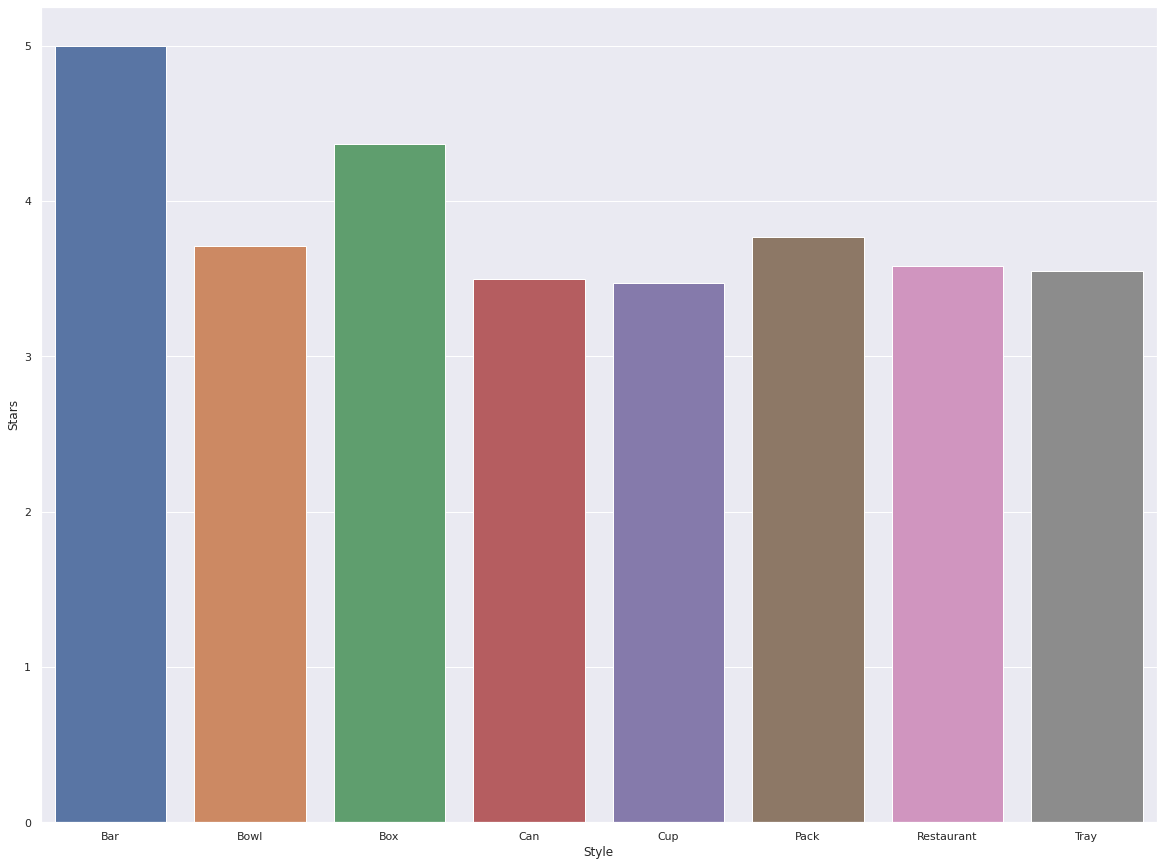

In [72]:
StyleStars = sns.barplot(x= 'Style', y= 'Stars', data = styleRatings)
sns.set(rc={'figure.figsize':(15,10)})

In [22]:
#Brand vs Stars
countries = df.groupby("Brand")
avgStars = countries['Stars'].agg(np.mean)
starsArr = avgStars.array
starDf = pd.DataFrame(starsArr)
brandRatings = pd.DataFrame(sorted(df['Brand'].unique()), columns=['Brand'])
brandRatings['Stars'] = starDf
brandRatings.head()

Brand  Stars
0     1 To 3 Noodles  4.000
1           7 Select  3.625
2    7 Select/Nissin  3.500
3  7-Eleven / Nissin  4.250
4              A-One  2.750

In [23]:
#brands with highest ratings on average in ascending
topBrand = brandRatings.sort_values(by ='Stars', ascending=False)
topBrand.head()

Brand  Stars
329                   Prima    5.0
441  The Ramen Rater Select    5.0
193    Komforte Chockolates    5.0
195                  Kubota    5.0
237                 Mazendo    5.0

In [78]:
#First 50 brands with highest ratings
topBrandStar = brandRatings.head(50)

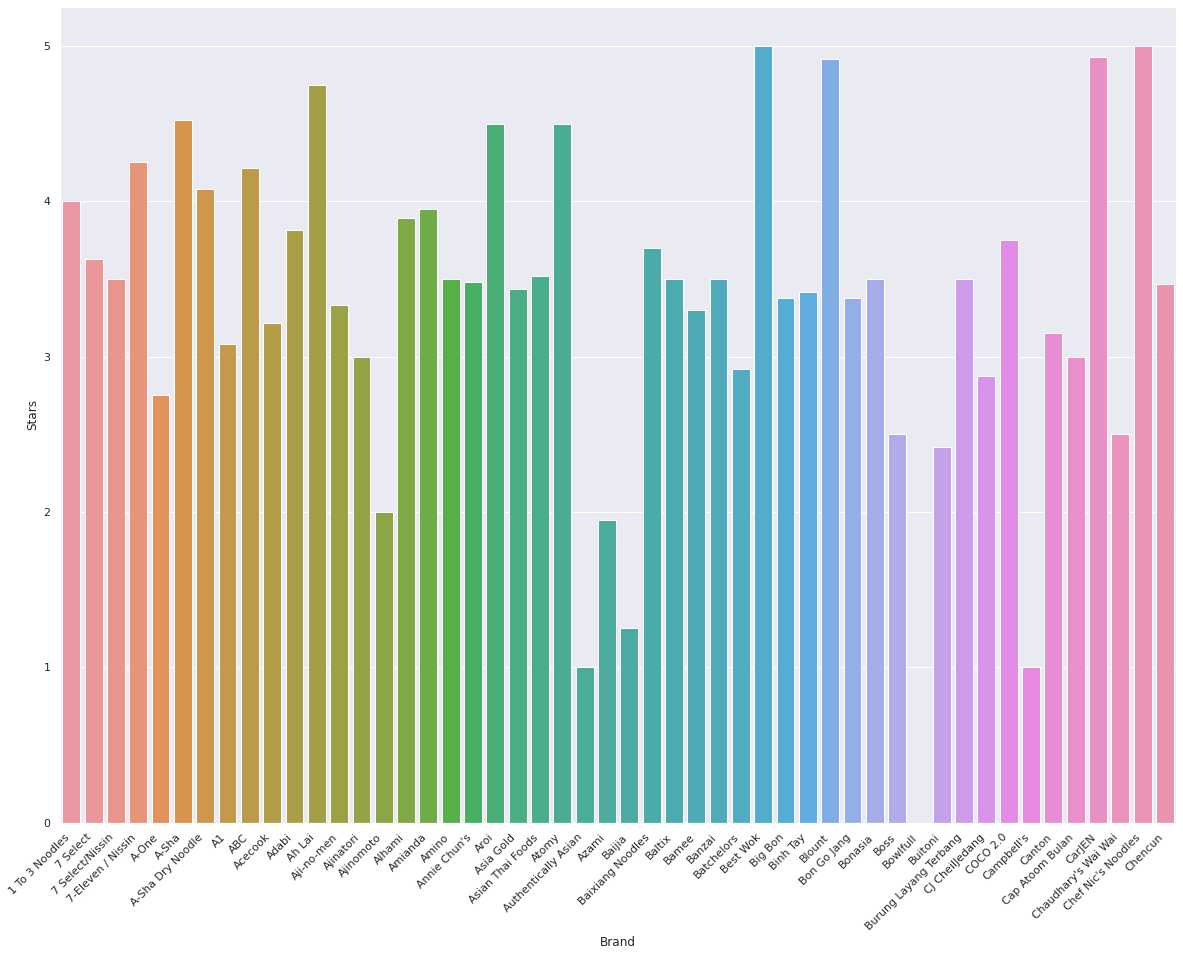

In [85]:
BrandStars = sns.barplot(x= 'Brand', y= 'Stars', data = topBrandStar)
BrandStars.set_xticklabels(BrandStars.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.set(rc={'figure.figsize':(20,15)})